# Deputado Fedral BA - 2018

Creado em: 14/06/2022

Dados do TSE + Voto da Gazeta do Povo

# Import Libs

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

# Snippets

In [ ]:
def to_df_from_list_of_objs_sorted(list_of_obj):
    """
        Converte de:
    [{'id': 5, 'nome': 'rafael'},  {'id': 6, 'nome': 'marta'}]
        Para DataFrame
    OBS: Esse processo é mais complxo pois tem que ser feito
    """
    variables = list_of_obj[0].keys()

    def aux_obj_to_list_sorted(obj, features):
        alist = []
        for feat in features:
            alist.append(obj[feat])
        return alist

    return pd.DataFrame(
                list( map( lambda x: aux_obj_to_list_sorted(x, variables), list_of_obj)),
                columns = variables)

In [ ]:
def convert_long_comment_in_string(long_txt):
    """
    Converte uma string grande em uma lista
    ideal para lsitar as colunas que queremos do dataset apartir deo uso de 3 aspas
    """
    return list(map(lambda x: x.strip(), long_txt.split('\n')[1:-1] ))

# Buscar dados do TSE

## TSE - `bem_candidato_2018_BA.csv`

In [94]:
df_bens = pd.read_csv('./../dataset/tse_csv/bem_candidato_2018_BA.csv', encoding='latin1', sep=';')
df_bens.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,05/06/2022,11:01:01,2018,2,Eleição Ordinária,297,Eleições Gerais Estaduais 2018,07/10/2018,BA,BA,BAHIA,50000600307,1,99,OUTROS BENS E DIREITOS,CAPITAL SOCIAL DA EMPRESA CEZAR ALMEIDA E ASSO...,"100000,00",21/07/2020,16:50:47
1,05/06/2022,11:01:01,2018,2,Eleição Ordinária,297,Eleições Gerais Estaduais 2018,07/10/2018,BA,BA,BAHIA,50000600307,2,23,Embarcação,EMBARCACAO FLOR DE MAQUINA ADQUIRIDA EM 2012 P...,"9000,00",21/07/2020,16:50:47
2,05/06/2022,11:01:01,2018,2,Eleição Ordinária,297,Eleições Gerais Estaduais 2018,07/10/2018,BA,BA,BAHIA,50000600307,3,29,Outros bens móveis,"CARRETA RODOVIARIA PARA JET SKI, PLACA OVA-6412","3800,00",21/07/2020,16:50:47


In [95]:
df_bens['VR_BEM_CANDIDATO'] = df_bens['VR_BEM_CANDIDATO'].apply(
    lambda x: float(x.replace(',','.')) if not pd.isna(x) else x
)

In [96]:
df_bens_final = df_bens.groupby('SQ_CANDIDATO').sum().reset_index()[['SQ_CANDIDATO','VR_BEM_CANDIDATO']]
df_bens_final.head()

,SQ_CANDIDATO,VR_BEM_CANDIDATO
0,50000600307,296860.69
1,50000600308,44700.00
2,50000600309,10000.00
3,50000600310,311056.95
4,50000600311,1243378.82


## TSE - `consulta_cand_2018_BA.csv` - Dados pessoais

In [118]:
df_candidato = pd.read_csv('./../dataset/tse_csv/consulta_cand_2018_BA.csv', encoding='latin1', sep=';')
df_candidato.head(2)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,05/06/2022,11:01:32,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,BA,BA,BAHIA,7,DEPUTADO ESTADUAL,50000606390,31168,ABRAAO JOVINIANO DOS SANTOS,ABRAAO JOVINIANO,#NULO#,44194234553,ABMSARAMANDAIA@GMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,31,PHS,PARTIDO HUMANISTA DA SOLIDARIEDADE,50000050178,RENOVA BAHIA,PHS / PPS / PRTB / PSL,1,BRASILEIRA NATA,BA,-3,SALVADOR,15/05/1968,50,23425590582,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,394,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,1000000,5,SUPLENTE,N,N,-1,6008347720186050000,2,DEFERIDO,2,DEFERIDO,SIM
1,05/06/2022,11:01:32,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,BA,BA,BAHIA,7,DEPUTADO ESTADUAL,50000606391,31112,EDMILSON SANTOS PASSOS,EDMILSON PASSOS,#NULO#,12486175504,EEDMILSON56@GMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,31,PHS,PARTIDO HUMANISTA DA SOLIDARIEDADE,50000050178,RENOVA BAHIA,PHS / PPS / PRTB / PSL,1,BRASILEIRA NATA,BA,-3,FEIRA DE SANTANA,03/03/1959,59,43136340566,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,401,"SUPERVISOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",1000000,5,SUPLENTE,N,N,-1,6008469120186050000,2,DEFERIDO,2,DEFERIDO,SIM


In [119]:
list_cols_candidato = """
SQ_CANDIDATO
DS_CARGO
NM_CANDIDATO
NR_CANDIDATO
NM_URNA_CANDIDATO
DS_SITUACAO_CANDIDATURA
DS_DETALHE_SITUACAO_CAND
NR_PARTIDO
SG_PARTIDO
NM_PARTIDO
NM_MUNICIPIO_NASCIMENTO
DT_NASCIMENTO
DS_GENERO
DS_GRAU_INSTRUCAO
DS_ESTADO_CIVIL
DS_COR_RACA
DS_OCUPACAO
ST_REELEICAO
DS_SIT_TOT_TURNO
DS_SITUACAO_CANDIDATO_URNA
"""

df_candidato = df_candidato[convert_long_comment_in_string(list_cols_candidato)]
df_candidato.head(1)

,SQ_CANDIDATO,DS_CARGO,NM_CANDIDATO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ST_REELEICAO,DS_SIT_TOT_TURNO,DS_SITUACAO_CANDIDATO_URNA
0,50000606390,DEPUTADO ESTADUAL,ABRAAO JOVINIANO DOS SANTOS,31168,ABRAAO JOVINIANO,APTO,DEFERIDO,31,PHS,PARTIDO HUMANISTA DA SOLIDARIEDADE,SALVADOR,15/05/1968,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,N,SUPLENTE,DEFERIDO


## TSE - `despesas_contratadas_candidatos_2018_BA.csv` - Despesas solicitadas

In [99]:
df_despesas_contratadas = pd.read_csv('./../dataset/tse_csv/despesas_contratadas_candidatos_2018_BA.csv', encoding='latin1', sep=';')
df_despesas_contratadas['VR_DESPESA_CONTRATADA'] = df_despesas_contratadas['VR_DESPESA_CONTRATADA'].apply(
    lambda x: float(x.replace(',','.')) if not pd.isna(x) else x
)
df_despesas_contratadas.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CD_TIPO_FORNECEDOR,DS_TIPO_FORNECEDOR,CD_CNAE_FORNECEDOR,DS_CNAE_FORNECEDOR,NR_CPF_CNPJ_FORNECEDOR,NM_FORNECEDOR,NM_FORNECEDOR_RFB,CD_ESFERA_PART_FORNECEDOR,DS_ESFERA_PART_FORNECEDOR,SG_UF_FORNECEDOR,CD_MUNICIPIO_FORNECEDOR,NM_MUNICIPIO_FORNECEDOR,SQ_CANDIDATO_FORNECEDOR,NR_CANDIDATO_FORNECEDOR,CD_CARGO_FORNECEDOR,DS_CARGO_FORNECEDOR,NR_PARTIDO_FORNECEDOR,SG_PARTIDO_FORNECEDOR,NM_PARTIDO_FORNECEDOR,DS_TIPO_DOCUMENTO,NR_DOCUMENTO,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,SQ_DESPESA,DT_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,05/06/2022,10:12:09,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,26/11/2018,419491763,BA,BA,BAHIA,31182083000100,6,Deputado Federal,50000609219,7777,LUCIANO ARAUJO DE OLIVEIRA,34808418568,-1,77,SOLIDARIEDADE,Solidariedade,0,Pessoa Física,-1,#NULO#,3255627508,VILMA VIEIRA DA SILVA,VILMA VIEIRA DA SILVA,-1,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,Outro,350,20800000,Atividades de militância e mobilização de rua,24356358,22/08/2018,COORDENACAO DE CAMPANHA - JACOBINA,2904.80
1,05/06/2022,10:12:09,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,26/11/2018,419491763,BA,BA,BAHIA,31182083000100,6,Deputado Federal,50000609219,7777,LUCIANO ARAUJO DE OLIVEIRA,34808418568,-1,77,SOLIDARIEDADE,Solidariedade,0,Pessoa Física,-1,#NULO#,3149191556,VALNEI CONCEICAO DOS SANTOS,VALNEI CONCEICAO DOS SANTOS,-1,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,Outro,057,20120000,Serviços prestados por terceiros,24356427,27/08/2018,SERVICO DE PLOTAGEM DE VEICULOS,1320.00
2,05/06/2022,10:12:09,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,26/11/2018,419491763,BA,BA,BAHIA,31182083000100,6,Deputado Federal,50000609219,7777,LUCIANO ARAUJO DE OLIVEIRA,34808418568,-1,77,SOLIDARIEDADE,Solidariedade,0,Pessoa Física,-1,#NULO#,3426663805,ADERVAL MOREIRA DIAS,ADERVAL MOREIRA DIAS,-1,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,Outro,351,20800000,Atividades de militância e mobilização de rua,24356577,22/08/2018,COORDENACAO DE CAMPANHA - SOBRADINHO,2904.80


In [100]:
list_cols_despesas_contratadas = """
DS_CARGO
SQ_CANDIDATO
NR_CANDIDATO
VR_DESPESA_CONTRATADA
"""

df_despesas_contratadas = df_despesas_contratadas[convert_long_comment_in_string(list_cols_despesas_contratadas)]
df_despesas_contratadas.head(3)

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,VR_DESPESA_CONTRATADA
0,Deputado Federal,50000609219,7777,2904.80
1,Deputado Federal,50000609219,7777,1320.00
2,Deputado Federal,50000609219,7777,2904.80


In [102]:
df_despesas_contratadas_final = df_despesas_contratadas.groupby('SQ_CANDIDATO').sum().reset_index()
df_despesas_contratadas_final.head(3)

,SQ_CANDIDATO,NR_CANDIDATO,VR_DESPESA_CONTRATADA
0,50000600307,336000,87763.02
1,50000600308,100089,4693.81
2,50000600309,86156,7344.85


## TSE - `receitas_candidatos_2018_BA.csv` - Receitas Candidatos

In [48]:
df_receitas = pd.read_csv('./../dataset/tse_csv/receitas_candidatos_2018_BA.csv', encoding='latin1', sep=';')
df_receitas['VR_RECEITA'] = df_receitas['VR_RECEITA'].apply(
    lambda x: float(x.replace(',','.')) if not pd.isna(x) else x
)

list_cols_receitas = """
DS_CARGO
SQ_CANDIDATO
NR_CANDIDATO
VR_RECEITA
"""

df_receitas = df_receitas[convert_long_comment_in_string(list_cols_receitas)]
df_receitas.head(3)

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,VR_RECEITA
0,Deputado Estadual,50000608045,40100,412.50
1,Deputado Estadual,50000608045,40100,690.00
2,Deputado Estadual,50000608045,40100,210.00


In [103]:
df_receitas_final = df_receitas.groupby(df_receitas.columns.tolist()[:-1]).sum().reset_index()
df_receitas_final.head(3)

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,VR_RECEITA
0,Deputado Estadual,50000600858,50180,11402.00
1,Deputado Estadual,50000600859,50509,2450.00
2,Deputado Estadual,50000600860,50850,100.00


# Juntar dados do TSE

In [120]:
df_tse = df_candidato.merge(df_bens_final, how='left', left_on='SQ_CANDIDATO', right_on='SQ_CANDIDATO')
df_tse = df_tse.merge(df_receitas_final, how='left', left_on='SQ_CANDIDATO', right_on='SQ_CANDIDATO')
df_tse = df_tse.merge(df_despesas_contratadas_final, how='left', left_on='SQ_CANDIDATO', right_on='SQ_CANDIDATO')

df_tse.head(3)

,SQ_CANDIDATO,DS_CARGO_x,NM_CANDIDATO,NR_CANDIDATO_x,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ST_REELEICAO,DS_SIT_TOT_TURNO,DS_SITUACAO_CANDIDATO_URNA,VR_BEM_CANDIDATO,DS_CARGO_y,NR_CANDIDATO_y,VR_RECEITA,NR_CANDIDATO,VR_DESPESA_CONTRATADA
0,50000606390,DEPUTADO ESTADUAL,ABRAAO JOVINIANO DOS SANTOS,31168,ABRAAO JOVINIANO,APTO,DEFERIDO,31,PHS,PARTIDO HUMANISTA DA SOLIDARIEDADE,SALVADOR,15/05/1968,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,N,SUPLENTE,DEFERIDO,NaN,NaN,NaN,NaN,NaN,NaN
1,50000606391,DEPUTADO ESTADUAL,EDMILSON SANTOS PASSOS,31112,EDMILSON PASSOS,APTO,DEFERIDO,31,PHS,PARTIDO HUMANISTA DA SOLIDARIEDADE,FEIRA DE SANTANA,03/03/1959,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,"SUPERVISOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",N,SUPLENTE,DEFERIDO,NaN,Deputado Estadual,31112.00,500.00,NaN,NaN
2,50000605139,DEPUTADO ESTADUAL,DAIANE SILVA RODRIGUES,20377,DAIANE RODRIGUES,APTO,DEFERIDO,20,PSC,PARTIDO SOCIAL CRISTÃO,SALVADOR,28/01/1981,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,COMERCIANTE,N,SUPLENTE,DEFERIDO,NaN,Deputado Estadual,20377.00,8616.54,122262.00,4746.20


In [140]:
replace_tse_cols = {
    'SQ_CANDIDATO': 'id_tse',
    'DS_CARGO_x': 'cargo',
    'NM_CANDIDATO': 'nome_completo',
    'NR_CANDIDATO_x': 'numero_candidato',
    'NM_URNA_CANDIDATO': 'nome_urna',
    'DS_SITUACAO_CANDIDATURA': 'situacao_candidatura',
    'DS_DETALHE_SITUACAO_CAND': 'detalhe_situacao_candidatura',
    'NM_PARTIDO': 'nome_partido',
    'NR_PARTIDO': 'numero_partido',
    'SG_PARTIDO': 'sigla_partido',
    'NM_MUNICIPIO_NASCIMENTO': 'municipio_nascimento',
    'DT_NASCIMENTO': 'data_nascimento',
    'DS_GENERO': 'genero',
    'DS_GRAU_INSTRUCAO': 'grau_instrucao',
    'DS_ESTADO_CIVIL': 'estado_civil',
    'DS_COR_RACA': 'cor_raca',
    'DS_OCUPACAO': 'ocupacao',
    'ST_REELEICAO': 'reeleicao',
    'DS_SIT_TOT_TURNO': 'venceu',
    'DS_SITUACAO_CANDIDATO_URNA': 'situacao_candidatura_urna',
    'VR_BEM_CANDIDATO': 'bens',
    'VR_RECEITA': 'receita_campanha',
    'VR_DESPESA_CONTRATADA': 'despesa_contratada_campanha',
}

df_tse = df_tse.rename(replace_tse_cols, axis='columns')
df_tse = df_tse.drop(['NR_CANDIDATO', 'NR_CANDIDATO_y', 'DS_CARGO_y'], axis='columns')
df_tse.head(3)

,id_tse,cargo,nome_completo,numero_candidato,nome_urna,situacao_candidatura,detalhe_situacao_candidatura,numero_partido,sigla_partido,nome_partido,municipio_nascimento,data_nascimento,genero,grau_instrucao,estado_civil,cor_raca,ocupacao,reeleicao,cargo_disputado,situacao_candidatura_urna,bens,receita_campanha,despesa_contratada_campanha
0,50000606390,DEPUTADO ESTADUAL,ABRAAO JOVINIANO DOS SANTOS,31168,ABRAAO JOVINIANO,APTO,DEFERIDO,31,PHS,PARTIDO HUMANISTA DA SOLIDARIEDADE,SALVADOR,15/05/1968,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,N,SUPLENTE,DEFERIDO,NaN,NaN,NaN
1,50000606391,DEPUTADO ESTADUAL,EDMILSON SANTOS PASSOS,31112,EDMILSON PASSOS,APTO,DEFERIDO,31,PHS,PARTIDO HUMANISTA DA SOLIDARIEDADE,FEIRA DE SANTANA,03/03/1959,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,"SUPERVISOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",N,SUPLENTE,DEFERIDO,NaN,500.00,NaN
2,50000605139,DEPUTADO ESTADUAL,DAIANE SILVA RODRIGUES,20377,DAIANE RODRIGUES,APTO,DEFERIDO,20,PSC,PARTIDO SOCIAL CRISTÃO,SALVADOR,28/01/1981,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,COMERCIANTE,N,SUPLENTE,DEFERIDO,NaN,8616.54,4746.20


In [135]:
df_tse = df_tse.replace({'#NULO#': np.NaN, -1: np.NaN})

<AxesSubplot:>

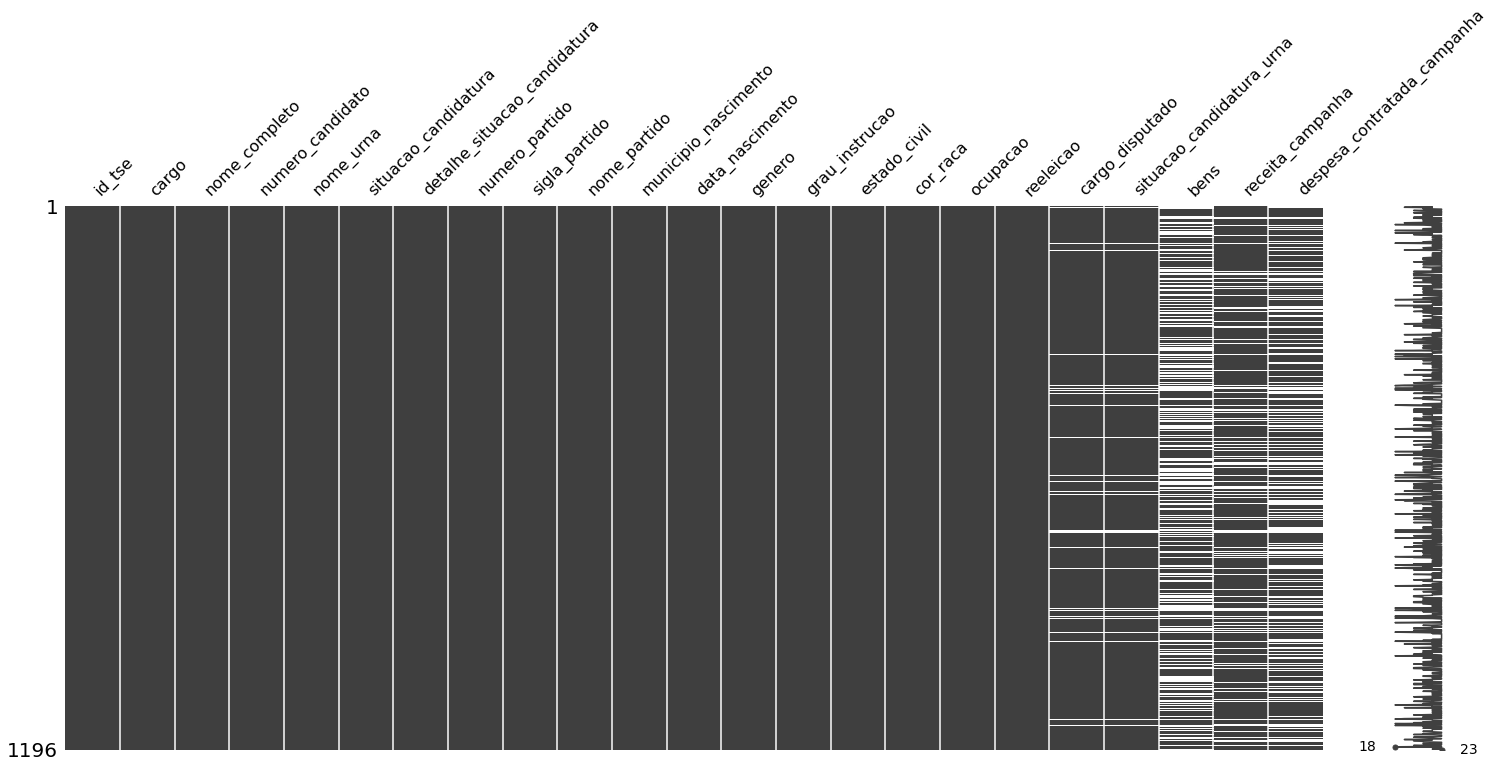

In [136]:
import missingno as msno
%matplotlib inline
msno.matrix(df_tse)

# Dados Gazeta do Povo - Votos por Cidade para DEPUTADO FEDERAL

Só consigo votos por cidade mas nao dados pessoais

In [71]:
def request_get(url, lib_parser = 'html.parser'):
    """
    lib_paeser : 'html.parser' // 
    return BeautifulSoupPage
    """
    response = requests.get(url)
    if(response.status_code != 200):
        print(url, 'Erro Code')
        quit()
    return BeautifulSoup(response.text, lib_parser)

In [72]:
deputado_info_url = 'https://especiais.gazetadopovo.com.br/eleicoes/2018/resultados/eleitos-deputado-federal-ba-quem-ganhou/'
soup_gazeta_all_deputado = request_get(deputado_info_url)

In [73]:
list_tr = soup_gazeta_all_deputado.find('tbody').find_all('tr')
deputado_info_urls = []

for el in list_tr:
    tds = el.find_all('td')
    deputado_info_urls.append(tds[0].find('a')['href'])
    
deputado_info_urls[0]

'https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/pastor-sargento-isidorio-7000/'

JUNHO DE 2022 
+ Infelsimente a pagina da gazeta com os sitse pessoasi nao funciona
+ Infelismente os dados do TSE nâo funcionam por webScraping

https://especiais.gazetadopovo.com.br/eleicoes/2018/resultados/municipios-bahia/deputado-federal-candidato-pastor-sargento-isidorio-7000/

In [86]:
# converte para url que tem dados dos votos por cidade
access_url = 'https://especiais.gazetadopovo.com.br/eleicoes/2018/resultados/municipios-bahia/deputado-federal-candidato-XXX/'
def replace_to_acess_url(the_url):
    return access_url.replace('XXX', the_url.split('/')[-2])

In [87]:
# demora 20minutos
list_votes_by_deputado = []

for deputado_url in deputado_info_urls:
    
    print(deputado_url)
    deputado_number = deputado_url.split('-')[-1]
    soup_page = request_get(replace_to_acess_url(deputado_url))
    deputado_url = deputado_url.split('/')[-2]
    
    list_tr = soup_page.find('tbody').find_all('tr')
    
    for el in list_tr:
        tds = el.find_all('td')
        # constants
        deputado_votes_dict = {}
        deputado_votes_dict['deputado_url'] = deputado_url
        deputado_votes_dict['deputado_number'] = deputado_number
        
        # each city
        deputado_votes_dict['url_the_city_votes'] = tds[0].find('a')['href']
        deputado_votes_dict['cidade'] = tds[0].find('h2').get_text().strip()
        deputado_votes_dict['percentage'] = tds[1].find('span', {'class': 'porcentagem'}).get_text().strip()
        deputado_votes_dict['votes'] = int(tds[1].find(
            'span', {'class': 'qtd-votos'}).get_text().split(' ')[0].strip().replace('.',''))

        list_votes_by_deputado.append(deputado_votes_dict)
    

https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/pastor-sargento-isidorio-7000/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/otto-alencar-filho-5588/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/bacelar-1919/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/prof-dayane-pimentel-1717/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/jorge-solla-1313/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/afonso-florence-1301/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/ze-neto-1323/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/antonio-brito-5510/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/alice-portugal-6522/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidato

https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/targino-gondim-4363/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/marcos-lima-4470/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/edigar-mao-branca-4313/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/adilson-silva-1777/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/dr-joao-barros-1755/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/odiosvaldo-vigas-1212/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/claudio-silva-3131/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/mirian-martinez-5533/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/vado-malassombrado-2544/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candida

https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/claudio-martins-3678/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/simone-mendes-5566/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/tony-neiva-2578/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/ze-do-sertao-3698/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/sergio-portella-7012/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/aroldo-pinto-4013/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/maria-da-luz-4022/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/dr-ademar-ribeiro-1256/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/roberto-dias-1207/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputa

https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/marina-da-farmacia-3325/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/antonio-batista-3315/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/bira-do-jegue-2541/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/zil-rangel-4434/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/naia-totinha-4303/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/vera-gomes-2527/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/reinaldo-3670/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/iza-oretti-3115/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/roseane-dias-2827/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal

https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/brites-portugal-5122/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/efraim-soares-1877/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/cleide-coutinho-5015/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/dulce-aquino-5023/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/prof-damiao-5051/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/nubia-estrela-3010/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/tonislei-santa-cruz-1890/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/ana-paula-cunha-1556/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/cabo-marcio-5138/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/

https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/lelego-1581/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/alex-brito-1833/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/madalena-moura-5135/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/itamar-alves-5049/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/eliel-amancio-1565/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/pedra-desse-chao-1514/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/djalma-bispo-2789/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/pastor-walisson-5025/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-federal/noelia-santa-rosa-5078/
https://especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/ba/deputado-

In [88]:
df_deputado_votos_by_city = to_df_from_list_of_objs_sorted(list_votes_by_deputado)
df_deputado_votos_by_city

,deputado_url,deputado_number,url_the_city_votes,cidade,percentage,votes
0,pastor-sargento-isidorio-7000,7000/,https://especiais.gazetadopovo.com.br/eleicoes...,Simões Filho,"26,15%",13806
1,pastor-sargento-isidorio-7000,7000/,https://especiais.gazetadopovo.com.br/eleicoes...,São Francisco do Conde,"24,84%",5909
2,pastor-sargento-isidorio-7000,7000/,https://especiais.gazetadopovo.com.br/eleicoes...,Madre de Deus,"24,75%",2821
3,pastor-sargento-isidorio-7000,7000/,https://especiais.gazetadopovo.com.br/eleicoes...,Candeias,"21,92%",9965
4,pastor-sargento-isidorio-7000,7000/,https://especiais.gazetadopovo.com.br/eleicoes...,Santo Amaro,"19,87%",6108
...,...,...,...,...,...,...
197236,joedson-1774,1774/,https://especiais.gazetadopovo.com.br/eleicoes...,Varzedo,"0,00%",0
197237,joedson-1774,1774/,https://especiais.gazetadopovo.com.br/eleicoes...,Vereda,"0,00%",0
197238,joedson-1774,1774/,https://especiais.gazetadopovo.com.br/eleicoes...,Wanderley,"0,00%",0
197239,joedson-1774,1774/,https://especiais.gazetadopovo.com.br/eleicoes...,Wenceslau Guimarães,"0,00%",0


In [89]:
df_deputado_votos_by_city.to_csv(
    'deputado_federal_ba_2018_votes_by_city.csv', index=False, sep=';')

# Juntar

In [142]:
df_votes_by_cities = pd.read_csv('./../dataset/generated/deputado_federal_ba_2018_votes_by_city.csv', sep=';')
df_votes_by_cities['deputado_number'] = df_votes_by_cities['deputado_number'].apply(lambda x: int(x.replace('/','')))
df_votes_by_cities = df_votes_by_cities.groupby('deputado_number').sum().reset_index()
df_tse = df_tse.merge(df_votes_by_cities, how='left', left_on='numero_candidato', right_on='deputado_number')

df_tse.to_csv(
    'tse_eleicoes_bahia_2018_cleaned.csv', index=False, sep=';')